In [208]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Load the data
data_path = "Amazon Sale Report.csv"
data = pd.read_csv(data_path)

C:\Users\harsh\AppData\Local\Temp\ipykernel_17792\3708111870.py:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [210]:
# Display the DataFrame schema
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [211]:
data.columns 

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [212]:
# Convert 'ship-postal-code' to String
data['ship-postal-code'] = data['ship-postal-code'].astype(str)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'].str.strip(), format='%m-%d-%y')

In [213]:
# Rename columns if necessary
data_import = data.rename(columns={'Date': 'Order Date'})


In [214]:
data_import.columns

Index(['index', 'Order ID', 'Order Date', 'Status', 'Fulfilment',
       'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category',
       'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [215]:
# Display the updated DataFrame schema
print(data_import.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Order Date          128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      122103 non-null  object        
 13  Qty                 128975 no

### sales analysis

1.	What is the total revenue generated over a time period?

In [216]:
#  Total revenue calculation
total_revenue = data_import['Amount'].sum()
print(f"Total Revenue: {total_revenue:.2f}")

Total Revenue: 78592678.30


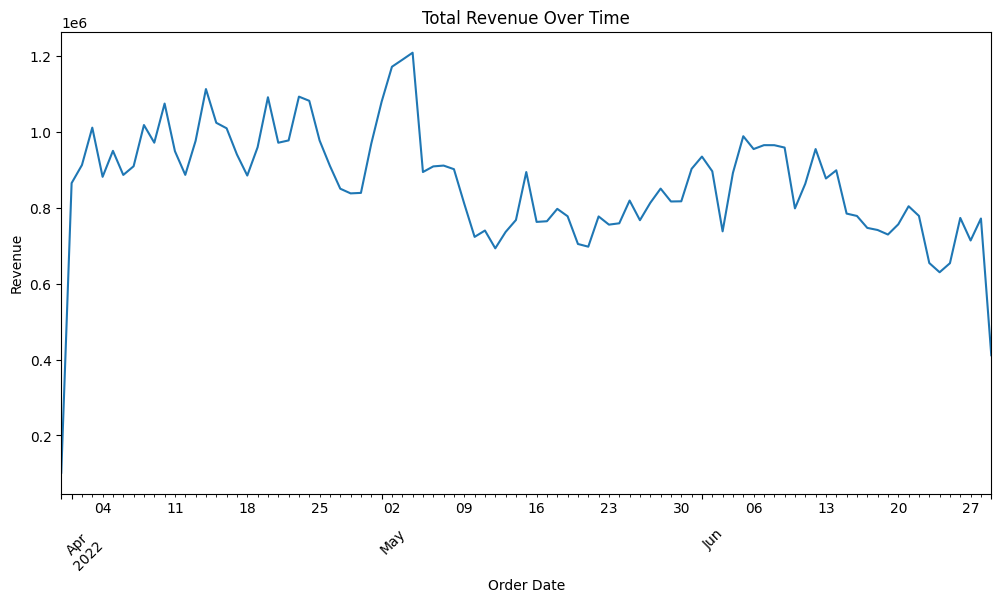

In [217]:
# Plot total revenue over time
daily_revenue = data_import.groupby('Order Date')['Amount'].sum()
daily_revenue.plot(figsize=(12, 6))
plt.title('Total Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

2.	What are the top 10 products by sales?

In [218]:
# Calculate sales by product
top_products = data_import.groupby('SKU')['Amount'].sum().nlargest(10)
print(top_products)



SKU
J0230-SKD-M        527699.20
JNE3797-KR-L       524581.77
J0230-SKD-S        479937.14
JNE3797-KR-M       454290.16
JNE3797-KR-S       407302.57
JNE3797-KR-XL      332155.24
J0230-SKD-L        305616.95
JNE3797-KR-XS      303616.70
SET268-KR-NP-XL    284058.96
JNE3797-KR-XXXL    276375.80
Name: Amount, dtype: float64


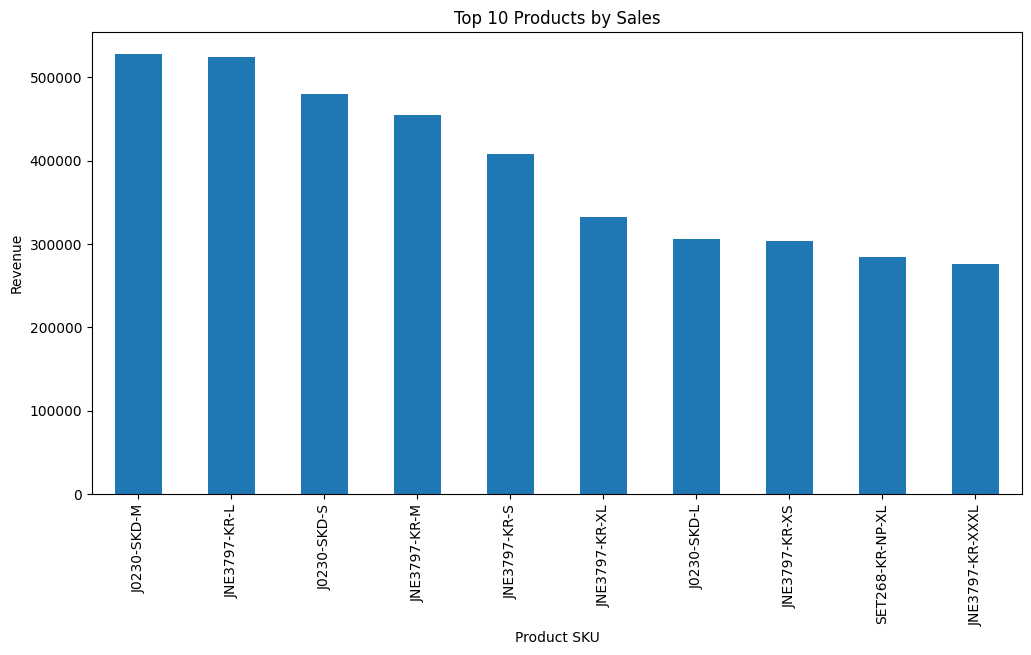

In [219]:
# Plot top 10 products by sales
top_products.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Products by Sales')
plt.xlabel('Product SKU')
plt.ylabel('Revenue')
plt.show()

3.	What is the average order value?

In [220]:
# Calculate average order value
average_order_value = data_import['Amount'].mean()
print(f"Average Order Value: {average_order_value:.2f}")

Average Order Value: 648.56


4.	What are the peak sales periods (day, week, month, year)?

In [221]:
# Extract day, week, month, year
data_import['Day of Week'] = data_import['Order Date'].dt.day_name()
data_import['Month'] = data_import['Order Date'].dt.month
data_import['Year'] = data_import['Order Date'].dt.year
data_import['Month Name'] = data_import['Order Date'].dt.month_name()

In [222]:
peak_sales_day_of_week = data_import.groupby('Day of Week')['Amount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


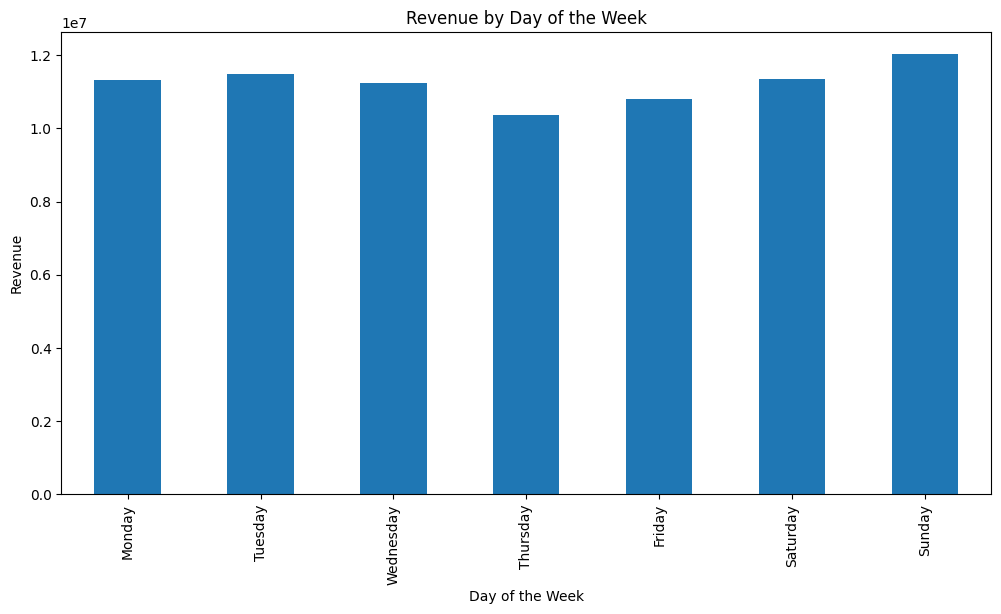

In [223]:
# Plot peak sales by day of the week
peak_sales_day_of_week.plot(kind='bar', figsize=(12, 6))
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.show()

In [224]:
monthly_sales =data_import.groupby('Month')['Amount'].sum()

In [225]:
# Define a proper month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
# Reindex and reorder the months
monthly_sales = monthly_sales.reindex(range(1, 13))  # Ensure all months are included
monthly_sales.index = pd.CategoricalIndex(monthly_sales.index, categories=range(1, 13), ordered=True)
monthly_sales = monthly_sales.sort_index()

In [226]:
# Convert month numbers to month names for plotting
monthly_sales.index = [month_order[i-1] for i in monthly_sales.index]

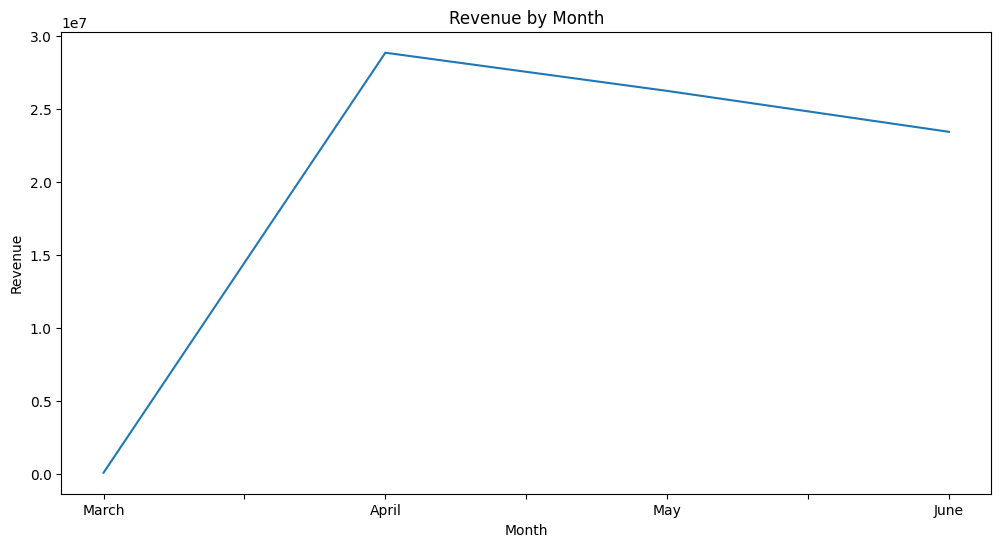

In [227]:
# Plot peak sales by month
monthly_sales.plot(figsize=(12,6))
plt.title('Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


### Customer Analysis

1.	What are the top cities/states/countries for sales?

In [228]:
# Top cities
top_cities = data_import.groupby('ship-city')['Amount'].sum().nlargest(10)
print(top_cities)

ship-city
BENGALURU    6849664.99
HYDERABAD    4946032.82
MUMBAI       3704461.80
NEW DELHI    3613874.78
CHENNAI      3098745.74
PUNE         2338518.18
KOLKATA      1414978.87
GURUGRAM     1221618.74
THANE        1004355.29
LUCKNOW       933926.34
Name: Amount, dtype: float64


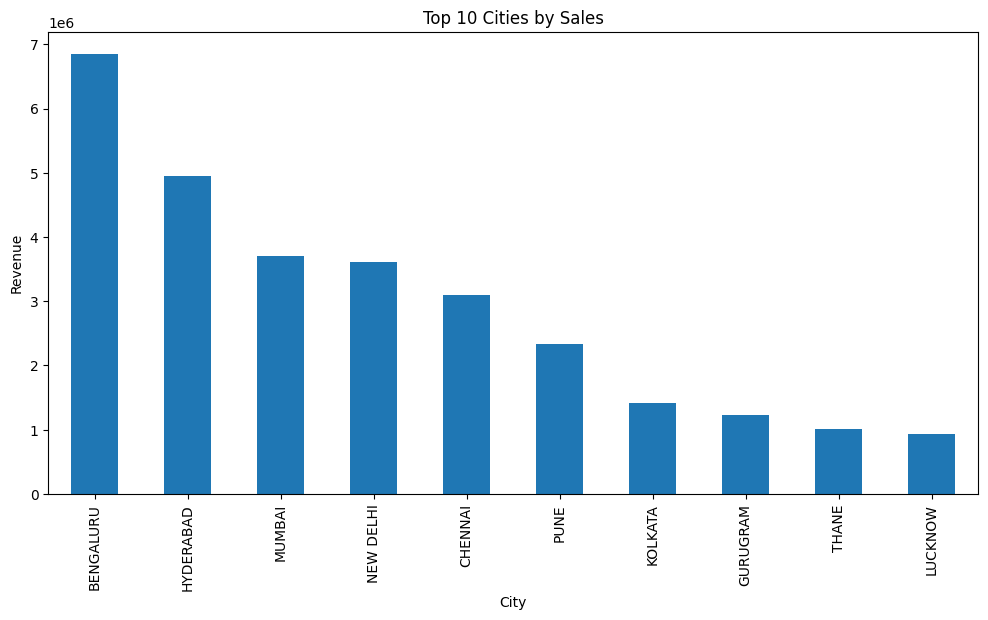

In [229]:
# Plot top cities by sales
top_cities.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.show()

In [230]:
# Top states
top_states = data_import.groupby('ship-state')['Amount'].sum().nlargest(10)
print(top_states)

ship-state
MAHARASHTRA       13335534.14
KARNATAKA         10481114.37
TELANGANA          6916615.65
UTTAR PRADESH      6816642.08
TAMIL NADU         6515650.11
DELHI              4235215.97
KERALA             3830227.58
WEST BENGAL        3507880.44
ANDHRA PRADESH     3219831.72
HARYANA            2882092.99
Name: Amount, dtype: float64


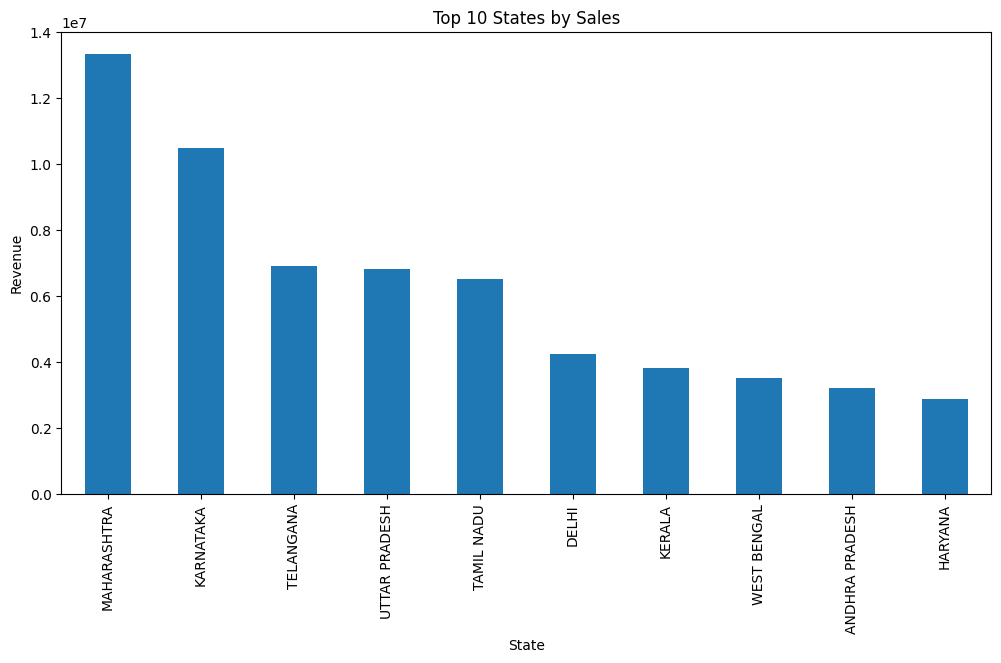

In [231]:
# Plot top states by sales
top_states.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.show()

In [232]:
# Top countries
top_countries = data_import.groupby('ship-country')['Amount'].sum().nlargest(10)
print(top_countries)

ship-country
IN    78574007.3
Name: Amount, dtype: float64


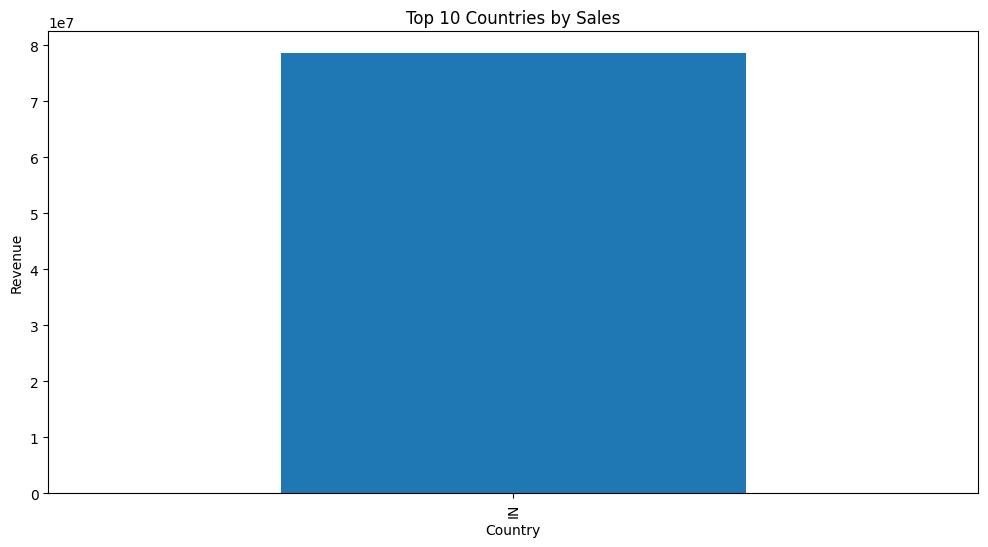

In [233]:

# Plot top countries by sales
top_countries.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

2.	Are there any trends in order cancellations?

In [234]:
# Count cancellations
data_import['Is Cancelled'] = data_import['Status'].str.contains('Cancelled', case=False, na=False)
cancellations = data_import[data_import['Is Cancelled']].groupby('Order Date').size()


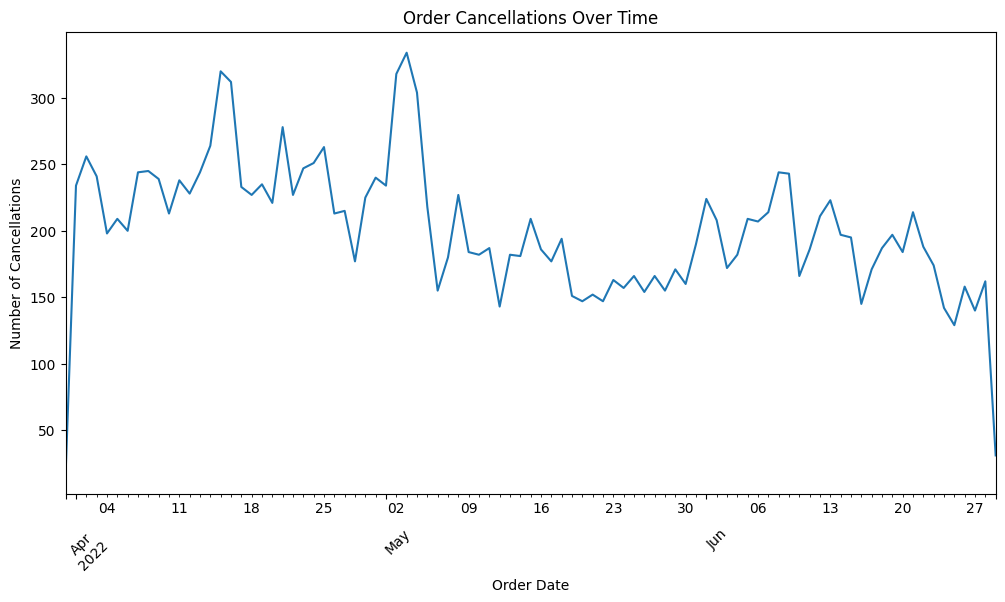

In [235]:
# Plot order cancellations over time
cancellations.plot(figsize=(12, 6))
plt.title('Order Cancellations Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

3.	What is the distribution of B2B vs B2C customers?

In [236]:
# Calculate B2B vs B2C distribution
b2b_vs_b2c = data_import['B2B'].value_counts(normalize=True) * 100
print(b2b_vs_b2c)

B2B
False    99.324675
True      0.675325
Name: proportion, dtype: float64


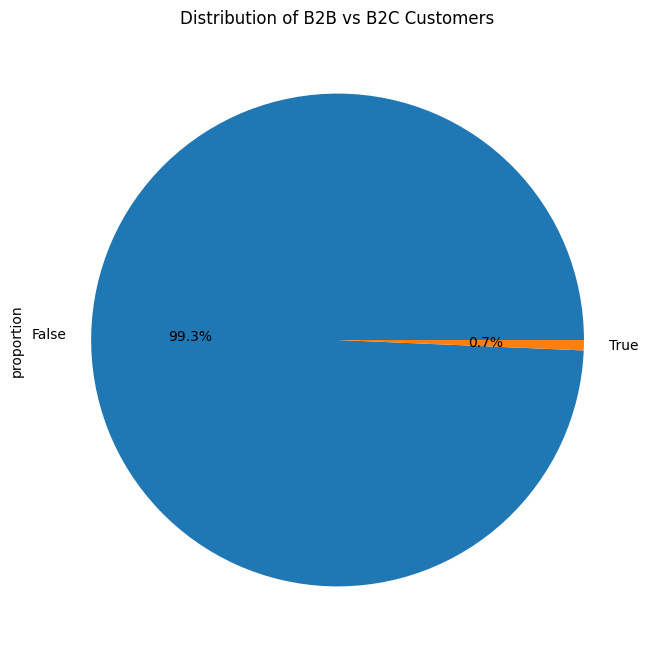

In [237]:
# Plot B2B vs B2C distribution
b2b_vs_b2c.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of B2B vs B2C Customers')
plt.show()

###	Shipping Analysis

1.	What percentage of orders are fulfilled by Amazon vs Merchant?

In [238]:
# Calculate fulfillment distribution
fulfillment_distribution = data_import['Fulfilment'].value_counts(normalize=True) * 100
print(fulfillment_distribution)

Fulfilment
Amazon      69.546811
Merchant    30.453189
Name: proportion, dtype: float64


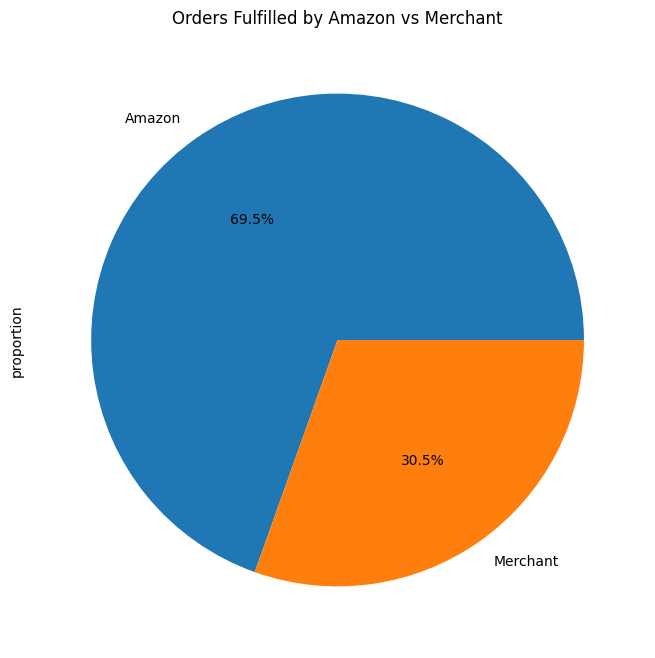

In [239]:
# Plot fulfillment distribution
fulfillment_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Orders Fulfilled by Amazon vs Merchant')
plt.show()


### Product Analysis

1.	Which categories of products are most popular?

In [240]:
# Most popular categories
popular_categories = data_import.groupby('Category')['Amount'].sum().nlargest(10)
print(popular_categories)

Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64


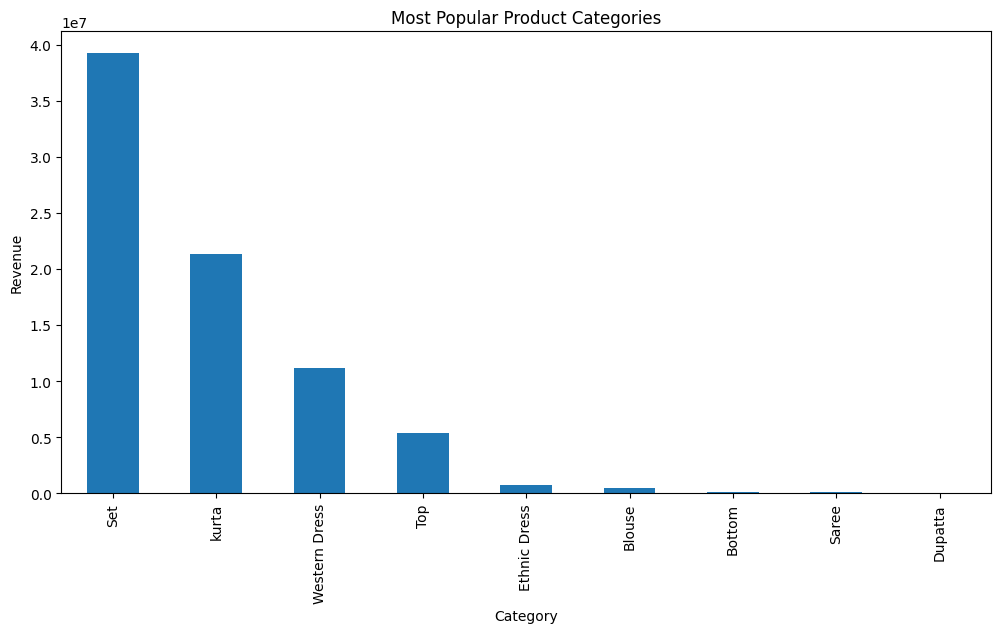

In [241]:
# Plot most popular categories
popular_categories.plot(kind='bar', figsize=(12, 6))
plt.title('Most Popular Product Categories')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

2.	Are there specific styles that are more popular than others?

In [242]:
# Most popular styles
popular_styles = data_import.groupby('Style')['Amount'].sum().nlargest(10)
print(popular_styles)

Style
JNE3797    2933482.00
J0230      1944948.48
SET268     1303923.56
J0341      1275322.87
J0003       981973.75
JNE3405     846822.36
J0008       819169.96
SET345      723402.79
SET324      720096.82
SET278      719791.48
Name: Amount, dtype: float64


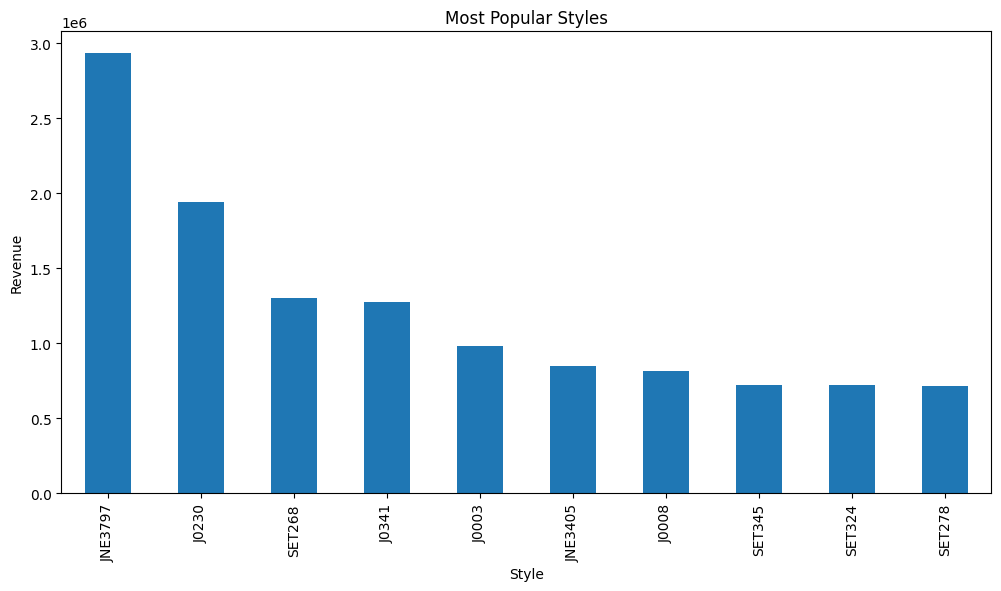

In [243]:
# Plot most popular styles
popular_styles.plot(kind='bar', figsize=(12, 6))
plt.title('Most Popular Styles')
plt.xlabel('Style')
plt.ylabel('Revenue')
plt.show()

3.	What is the average quantity of products ordered?

In [244]:
# Calculate average quantity
average_quantity = data_import['Qty'].mean()
print(f"Average Quantity of Products Ordered: {average_quantity:.2f}")


Average Quantity of Products Ordered: 0.90


### Promotional  Analysis

1.	Which promotions are most commonly used?

In [245]:
# Most common promotions
common_promotions = data_import['promotion-ids'].value_counts().nlargest(10)
print(common_promotions)

promotion-ids
IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

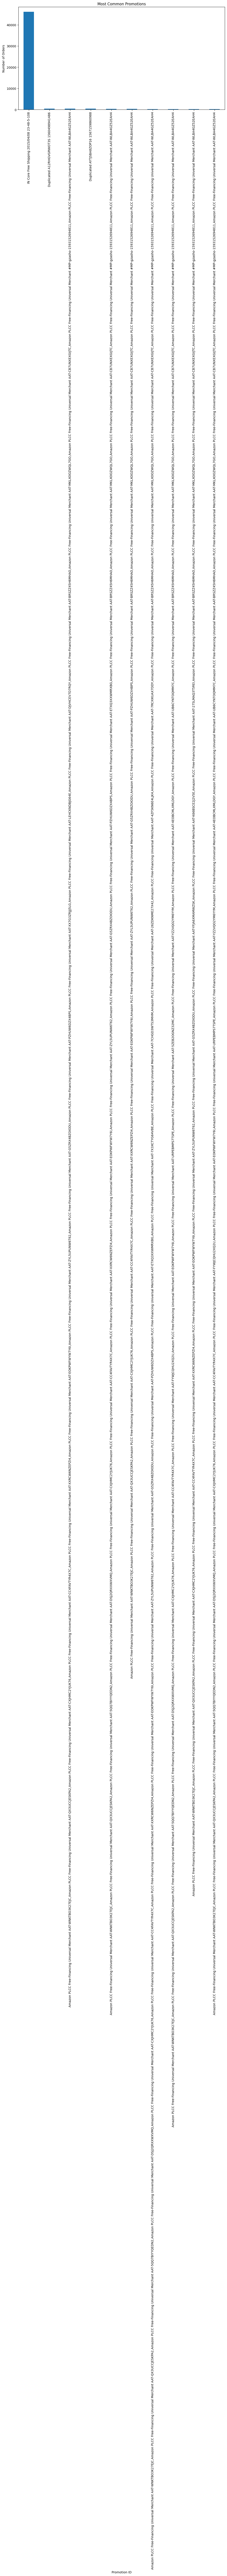

In [246]:
# Plot most common promotions
common_promotions.plot(kind='bar', figsize=(12, 6))
plt.title('Most Common Promotions')
plt.xlabel('Promotion ID')
plt.ylabel('Number of Orders')
plt.show()

### Geographical Analysis

1.	What are the key markets (cities/states/countries) for sales?

In [247]:
# Aggregate sales by city
city_sales = data_import.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)

# Print top cities
print(city_sales.head(10))



ship-city
BENGALURU    6849664.99
HYDERABAD    4946032.82
MUMBAI       3704461.80
NEW DELHI    3613874.78
CHENNAI      3098745.74
PUNE         2338518.18
KOLKATA      1414978.87
GURUGRAM     1221618.74
THANE        1004355.29
LUCKNOW       933926.34
Name: Amount, dtype: float64


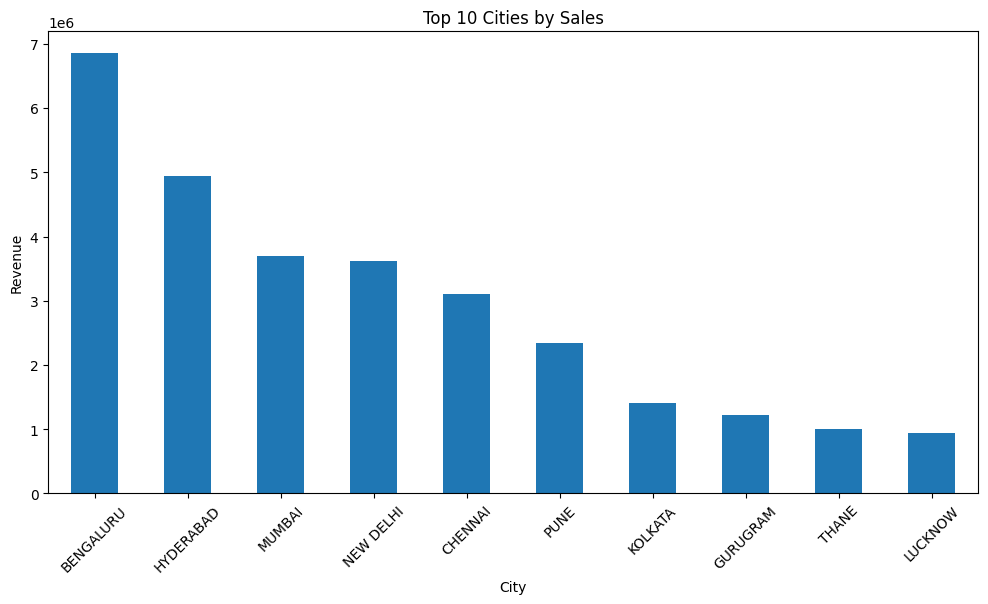

In [248]:

# Plot top cities by sales
city_sales.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [249]:
# Aggregate sales by state
state_sales = data_import.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Print top states
print(state_sales.head(10))



ship-state
MAHARASHTRA       13335534.14
KARNATAKA         10481114.37
TELANGANA          6916615.65
UTTAR PRADESH      6816642.08
TAMIL NADU         6515650.11
DELHI              4235215.97
KERALA             3830227.58
WEST BENGAL        3507880.44
ANDHRA PRADESH     3219831.72
HARYANA            2882092.99
Name: Amount, dtype: float64


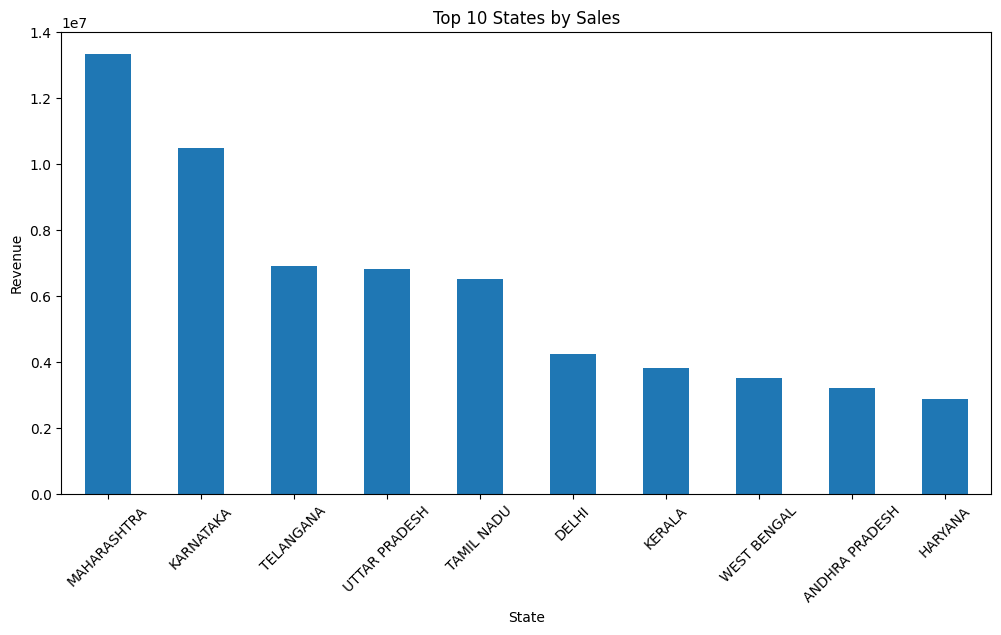

In [250]:

# Plot top states by sales
state_sales.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [251]:
# Aggregate sales by country
country_sales = data_import.groupby('ship-country')['Amount'].sum().sort_values(ascending=False)

# Print top countries
print(country_sales.head(10))




ship-country
IN    78574007.3
Name: Amount, dtype: float64


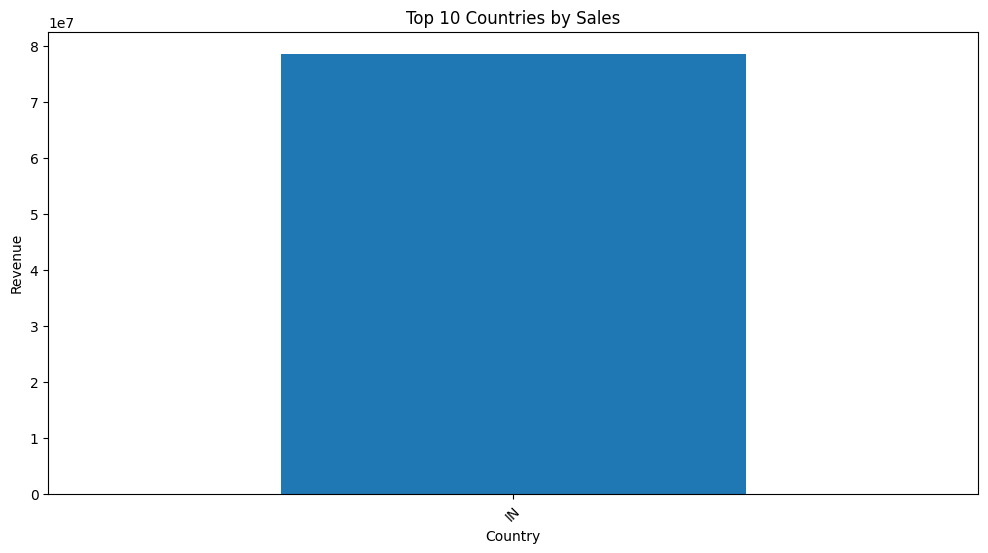

In [252]:
# Plot top countries by sales
country_sales.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### monthly Analysis

1.	How do monthly trends affect various product categories?

In [253]:
# Calculate sales by month and category
monthly_category_sales = data_import.groupby(['Month', 'Category'])['Amount'].sum().unstack()
monthly_category_sales = monthly_category_sales.fillna(0)

In [254]:
# Ensure month index is an integer and reindex to match month names
monthly_category_sales.index = monthly_category_sales.index.astype(int)
monthly_category_sales = monthly_category_sales.reindex(range(1, 13))  # Ensure all months are included

# Convert month numbers to month names for plotting
monthly_category_sales.index = [month_order[i-1] for i in monthly_category_sales.index]


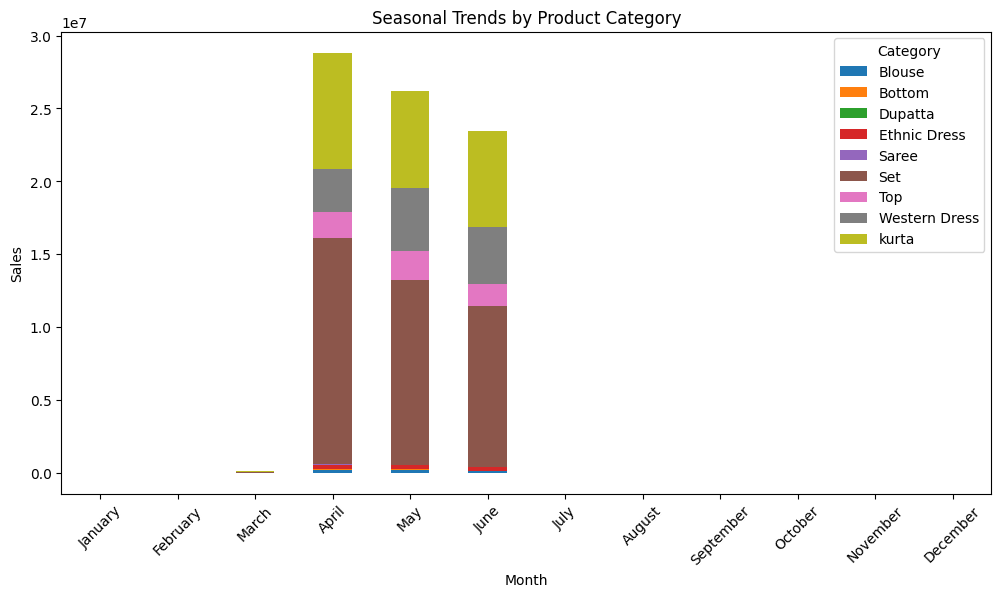

In [255]:
# Plotting
monthly_category_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Seasonal Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

### Return and Cancellation Analysis Analysis

1.	What is the return and cancellation rate?

In [256]:
# Calculate return and cancellation rates
return_rate = data_import['Status'].str.contains('Return', case=False, na=False).mean() * 100
cancellation_rate = data_import['Status'].str.contains('Cancelled', case=False, na=False).mean() * 100

In [257]:
print(f'Return Rate: {return_rate:.2f}%')

Return Rate: 1.63%


In [258]:

print(f'Cancellation Rate: {cancellation_rate:.2f}%')

Cancellation Rate: 14.21%


2.	Are there specific products or categories that have a higher return rate?

In [259]:
# Calculate return rates by SKU
return_rates = data_import[data_import['Status'].str.contains('Return', case=False, na=False)].groupby('SKU').size() / data_import.groupby('SKU').size()
high_return_products = return_rates.nlargest(10)
print(high_return_products)

SKU
BL025-74BLACK            1.0
BL075-85CHIKU            1.0
BTM029-NP-XS             1.0
J0102-SKD-L              1.0
J0131-KR-A-M             1.0
J0205-TP-XXXL            1.0
J0324-CD-L               1.0
JNE2131-KR-A-S           1.0
JNE2251-KR-537-C-XXXL    1.0
JNE3284-KR-XXL           1.0
dtype: float64


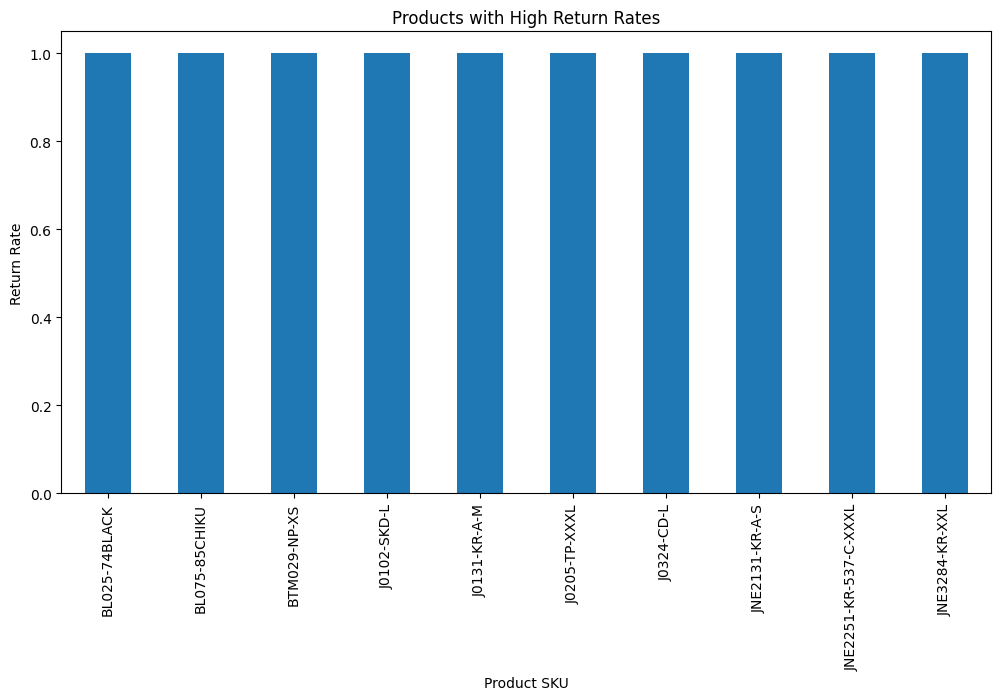

In [260]:
# Plot products with high return rates
high_return_products.plot(kind='bar', figsize=(12, 6))
plt.title('Products with High Return Rates')
plt.xlabel('Product SKU')
plt.ylabel('Return Rate')
plt.show()